# PPHA 30546 Machine Learning Problem Set 1
## Richard Campo in collaboration with Julia Klauss

In [1]:
from IPython.display import Image
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

### Chapter 2: Question 3
#### (a)

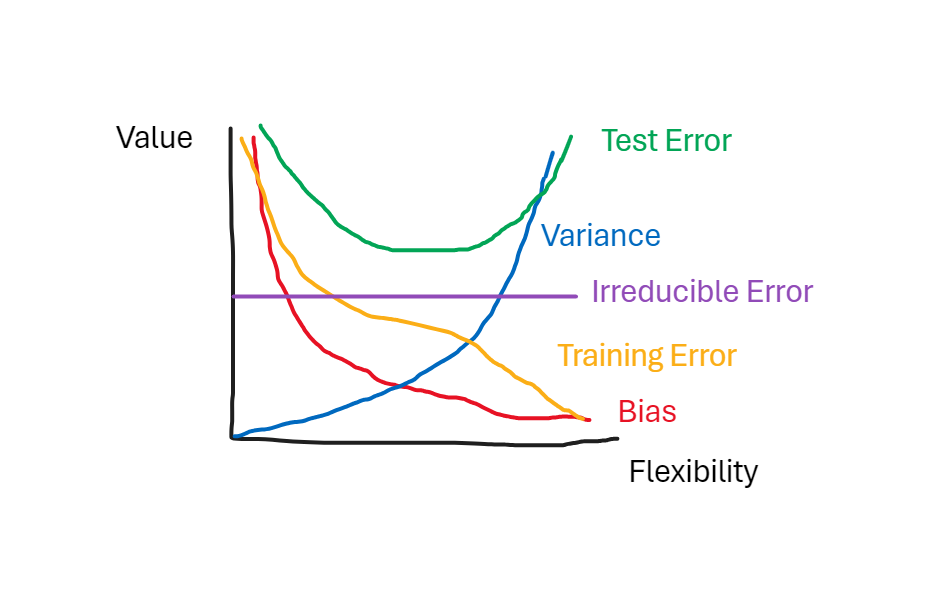

In [4]:
# https://stackoverflow.com/a/11855133
Image(filename="./Machine Learning Pset 1 Curves.png")

#### (b)
- Bias decreases as flexibility increases because the model can overfit the data. Bias tends to decrease faster at lower levels of flexibility because adding just a little curvature can allow the model to fit the data much better, but once you have lots of flexibility, adding more won't do much.

- Variance increases as flexibility increases because the model is more sensitive to new training data. Variance tends to increase at an increasing rate because very flexible models will change more than less flexible models when provided new training data due to overfitting.

- Training error decreases as flexibility increases because the model can fit the data more closely. Eventually, the most flexible model can correctly predict every point in the data by overfitting.

- Test error first decreases and then increases as flexibility increases. When flexibility is low, adding flexibility allows the model to more closely fit the training data and accurately predict the test data. However, when flexibility is high, adding flexibility causes overfitting, which lowers training error but increases test error.

- Irreducible error is a constant = Var(&epsilon;)


### Chapter 2: Question 5

The advantage of a very flexibile approach is that the model can more closely fit the training data and more accurately predict the test data. However, the disadvantage of a very flexible approach is that the model can overfit the training data, meaning the model will make very accurate predictions on the training data, but not generalize to the test data.

A more flexible approach is preferred when the true underlying relationship in the data is very nonlinear because a line can't fit the data well. On the other hand, a less flexible approach is preferred when the true underlying relationship in the data is linear or approximately linear because flexible methods will overfit the data.

### Chapter 2: Question 10
#### (a)

In [2]:
PATH = r"C:\Users\RichardCampo\Documents\GitHub\Machine-Learning\Boston"
df_boston = pd.read_csv(os.path.join(PATH, "Boston.csv"))

#### (b)

In [3]:
print(df_boston.shape)
df_boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


There are 506 rows and 14 columns in the dataset. Rows represent census tracts in the Boston area and columns represent variables describing each census tract. Additional information about the variables is available in the data description text file.

#### (c)

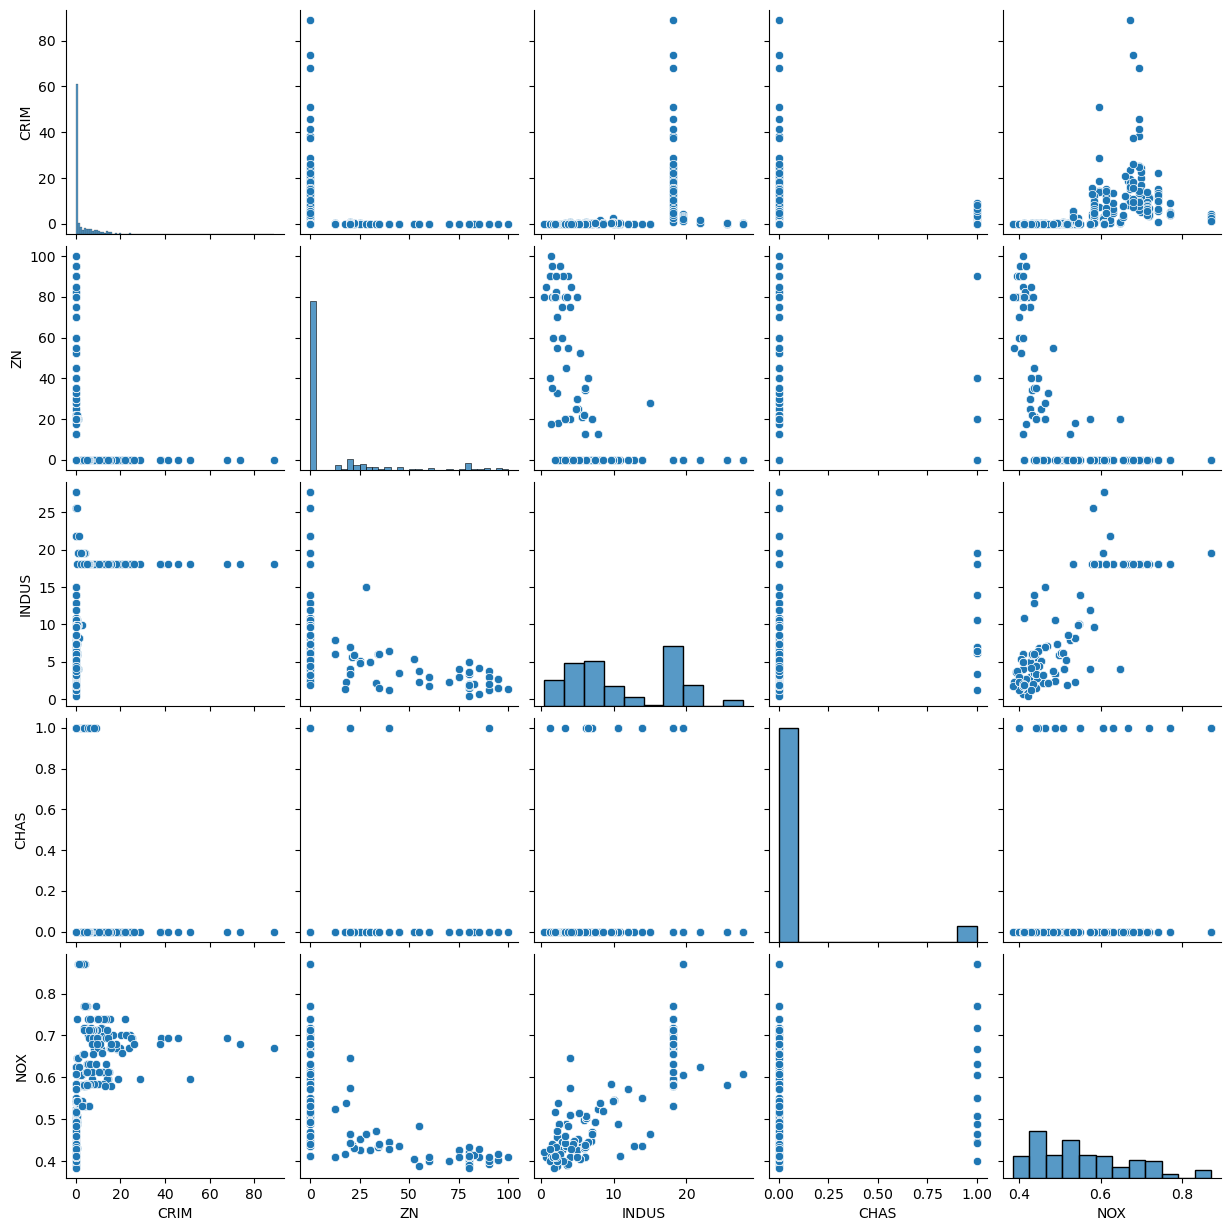

In [4]:
# Plot first 5 variables to make it easier to read
sns.pairplot(df_boston.iloc[:, :5])

Looking at the scatterplots, there is a positive correlations between nitric oxide concentration and the number of acres zoned for industry in a census district, which is unsurprising. It also looks like there is a negative association between the number of acres zoned for residential buildings and the amount of nitric oxide and amount of acres zoned for industry. This also makes sense. Lastly, per capita crime appears to be positively correlated with the concentration of nitric oxides. We could make the same plots using the other variables in the data set, but these have been excluded to save space.

#### (d)

In [5]:
df_boston.corr()["CRIM"].sort_values(ascending=False)

CRIM       1.000000
RAD        0.622029
TAX        0.579564
LSTAT      0.452220
NOX        0.417521
INDUS      0.404471
AGE        0.350784
PTRATIO    0.288250
CHAS      -0.055295
ZN        -0.199458
RM        -0.219940
B         -0.377365
DIS       -0.377904
MDEV      -0.385832
Name: CRIM, dtype: float64

Most of the predictors are at least weakly associated with crime. The strongest correlation is between per capita crime and access to radial highways, maybe because areas close to highways are poorer or maybe because criminals use highways to move illegal drugs. Property tax rate is also positively associated with crime, perhaps because property taxes are higher closer to the city center where crime is more prevalent. Lastly, LSTAT, the percentage of people in the census district who are "lower status" (presumably in terms of income), is also positively correlated with per capita crime, which is what we expect.

#### (e)

             CRIM         TAX     PTRATIO
count  506.000000  506.000000  506.000000
mean     3.593761  408.237154   18.455534
std      8.596783  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.647423  666.000000   20.200000
max     88.976200  711.000000   22.000000


array([[<Axes: title={'center': 'CRIM'}>,
        <Axes: title={'center': 'TAX'}>],
       [<Axes: title={'center': 'PTRATIO'}>, <Axes: >]], dtype=object)

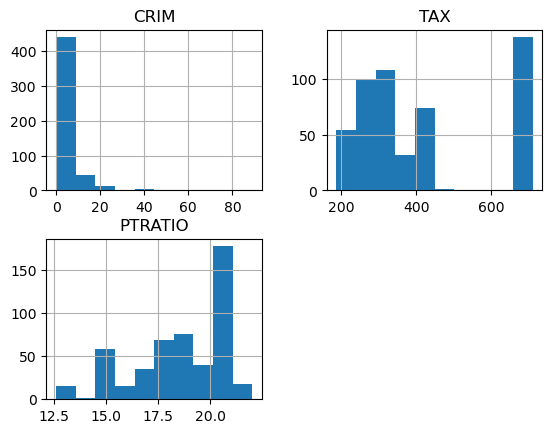

In [42]:
print(df_boston[["CRIM", "TAX", "PTRATIO"]].describe())
df_boston[["CRIM", "TAX", "PTRATIO"]].hist()

Most census tracts have low crime per capita since the mean is only about 3.6. However, a small number of census tracts have high per capita crime rates, up to a maximum of almost 89.

Census tracts in Boston have full-value property tax rates per $10,000 that vary from 187 to 711, but there is a large valley between about 450 and 650. A large group of census tracts have high property tax rates, possibly because they are close to the city center.

Lastly, pupil-teacher ratios vary from 12.6 to 22 pupils per teacher, with a large number of census districts having 20 to 21 pupils per teacher. These higher ratio census districts may also be closer to the city center where schools tend to have less funding per student. 

#### (f)

In [6]:
borders = len(df_boston[df_boston["CHAS"] == 1])

print(borders)
print(borders/len(df_boston) * 100, "%")

35
6.91699604743083 %


35 of the 506 census tracts border the Charles River, or about 7% of census tracts in the dataset.

#### (g)

In [7]:
df_boston["PTRATIO"].median()

19.05

The median pupil-teacher ratio of census tracts in the dataset is 19.05 pupils per teacher.

#### (h)

In [11]:
df_boston.loc[[df_boston["MDEV"].idxmin()]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0


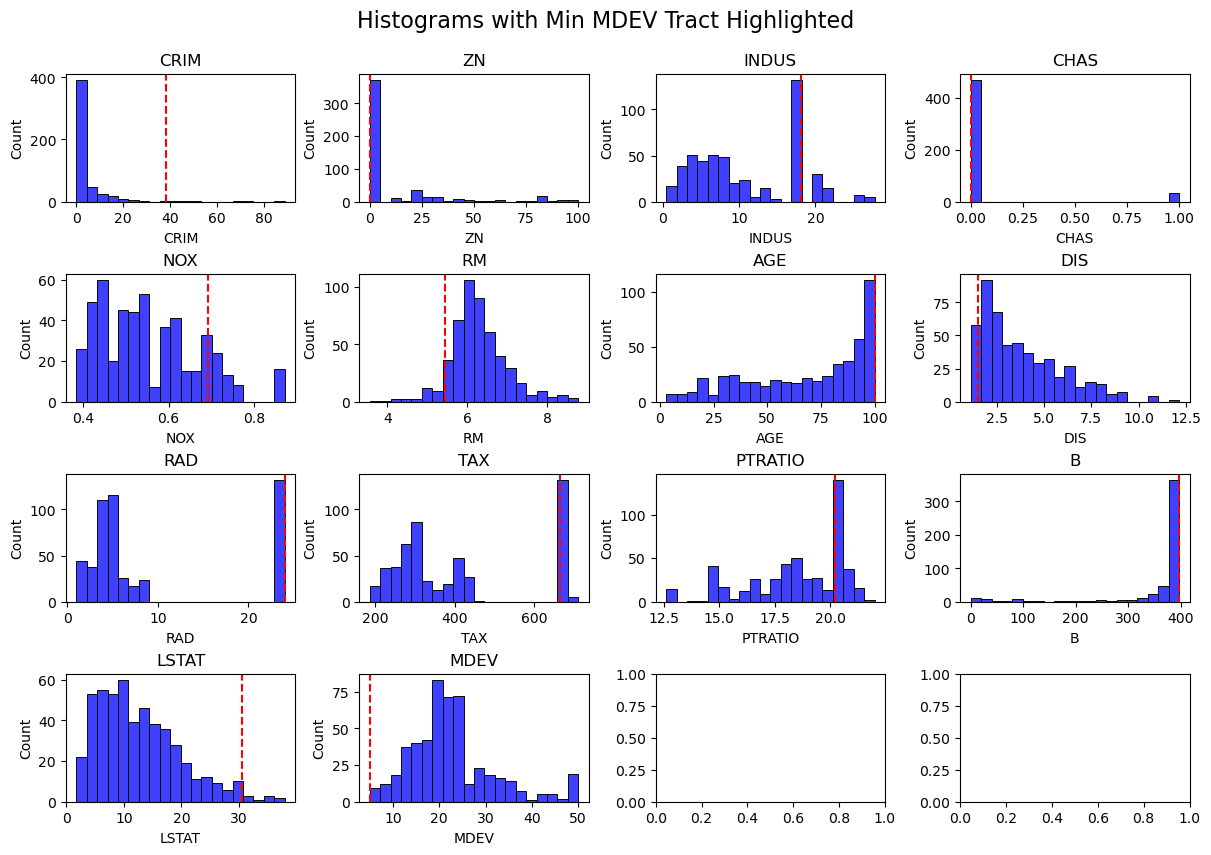

In [46]:
min_row_index = df_boston["MDEV"].idxmin()
min_row = df_boston.loc[[min_row_index]]

# https://stackoverflow.com/a/53649492
fig, axs = plt.subplots(4, 4, figsize=(12, 8), constrained_layout=True)
fig.suptitle("Histograms with Min MDEV Tract Highlighted", fontsize=16, y=1.05)

# Plot a histogram showing distribution for each variable with red line
# showing the value for the census tract with lowest MDEV.
for ax, column in zip(axs.flatten(), df_boston.columns):
    sns.histplot(df_boston[column], bins=20, color='blue', ax=ax)
    ax.axvline(x=min_row[column].values[0], color='red', linestyle='dashed')
    ax.set_title(column)

The census tract with the lowest median value of owner-occupied homes is located in row 398 and has a median home value of $5,000. This is much lower than the median value of $21.2 thousand. This census tract also has high crime per capita, an above average amount of industrially zoned space, above average nitric oxide concentration, low average number of rooms per building, very old buildings, low distance to the city employment centers, high accessibility to radial highways, high property taxes, a high pupil-teacher ratio, and a high proportion of people with low incomes.

This helps show that median home value is correlated with many of the other variables in our data set, so we want to use multiple regression to isolate the partial effects of each variable.

#### (i)

In [47]:
print(len(df_boston.loc[df_boston["RM"] > 7]))
print(len(df_boston.loc[df_boston["RM"] > 8]))

64
13


There are 64 census tracts where the average number of rooms per home is greater than 7, and there are 13 census tracts where the average number of rooms per home is more than 8.

In [48]:
more_than_8 = df_boston.loc[df_boston["RM"] > 8].mean()
avg_values = df_boston.mean()

comparison = pd.concat([more_than_8, avg_values], axis = 1)
comparison.columns = ["more_than_8", "avg_values"]

print(comparison)

         more_than_8  avg_values
CRIM        0.718795    3.593761
ZN         13.615385   11.363636
INDUS       7.078462   11.136779
CHAS        0.153846    0.069170
NOX         0.539238    0.554695
RM          8.348538    6.284634
AGE        71.538462   68.574901
DIS         3.430192    3.795043
RAD         7.461538    9.549407
TAX       325.076923  408.237154
PTRATIO    16.361538   18.455534
B         385.210769  356.674032
LSTAT       4.310000   12.653063
MDEV       44.200000   22.532806


Census tracts with more than eight rooms per dwelling tend to have low crime, have less industrially zoned land, are more likely to border the Charles River, have a smaller share of low income residents, and have high median home values. These are likely the fancier, wealthier areas of Boston where people can afford large, expensive homes.

### Chapter 3: Question 3
#### (a)

The "true" regression model is: $$salary = \beta_0 + \beta_1 GPA + \beta_2 IQ + \beta_3 level + \beta_4 GPA \times IQ + \beta_5 GPA \times level + \epsilon$$

We estimate the model: $$\widehat{salary} = 50 + 20 (GPA) + 0.07 (IQ) + 35 (level) + 0.01 (GPA \times IQ) - 10 (GPA \times level) + e$$

The answer is (ii). For a fixed value of IQ and GPA, college graduates earn more on average than high school graduates. This is because $\beta_3$, the coefficient of level is 35, meaning a college graduate can expect a $35,000 higher starting salary than a high school graduate on average, all else constant. The estimated coefficient of -10 for the interaction of GPA and level indicates that for college graduates, the slope of GPA is more shallow, but we are interested in the average difference between levels for this question, not GPA.

#### (b)
Based on our model, we predict that the starting salary of a college graduate with an IQ of 110 and a GPA of 4.0 will be $$50 + 20(4.0) + 0.07(110) + 35(1) + 0.01(4.0)(110) - 10 (4.0)(1) = 137.1$$
or $137.1 thousand.

#### (c)

False. Just because the coefficient for the interaction between GPA and IQ is small does not mean there is little evidence of an interaction effect. The formula for a t-test to check if the coefficient is statistically significant is:
$$ t =\frac{\hat{\beta_j} - \beta_j}{SE(\hat{\beta_j})} $$
This means that even if the estimated coefficient is small, as long as the standard error is also very small, the coefficient could be statistically significant.

### Chatper 3: Question 15
#### (a)

In [8]:
predictors = list(df_boston.columns)
predictors.remove("CRIM")

univar_coefs = {} # for part (c)

for predictor in predictors:
    X = df_boston[predictor]
    X = sm.add_constant(X) # add intercept to regression model
    y = df_boston["CRIM"]

    model = sm.OLS(y, X).fit()

    # Extract coefficient variable names and values for part (c)
    univar_coefs[predictor] = model.params[predictor] 

    print(f"Regression results for {predictor}:")
    display(model.summary())
    print("\n")


Regression results for ZN:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     20.88
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           6.15e-06
Time:                        14:18:54   Log-Likelihood:                -1795.8
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4292      0.417     10.620      0.000       3.610       5.249
ZN            -0.0735      0.016     -4.570      0.000      -0.105      -0.042
==============================================================================
Omnibus:                      568.366   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32952.356
Skew:                           5.270   Prob(JB):                         0.00
Kurtosis:                      41.103   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for INDUS:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     98.58
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.44e-21
Time:                        14:18:54   Log-Likelihood:                -1760.9
No. Observations:                 506   AIC:                             3526.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0509      0.668     -3.072      0.002      -3.362      -0.739
INDUS          0.5068      0.051      9.929      0.000       0.407       0.607
==============================================================================
Omnibus:                      585.528   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41469.710
Skew:                           5.456   Prob(JB):                         0.00
Kurtosis:                      45.987   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for CHAS:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.546
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.214
Time:                        14:18:55   Log-Likelihood:                -1805.3
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7232      0.396      9.404      0.000       2.945       4.501
CHAS          -1.8715      1.505     -1.243      0.214      -4.829       1.086
==============================================================================
Omnibus:                      562.698   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30864.755
Skew:                           5.205   Prob(JB):                         0.00
Kurtosis:                      39.818   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for NOX:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     106.4
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           9.16e-23
Time:                        14:18:55   Log-Likelihood:                -1757.6
No. Observations:                 506   AIC:                             3519.
Df Residuals:                     504   BIC:                             3528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5881      1.702     -7.986      0.000     -16.931     -10.245
NOX           30.9753      3.003     10.315      0.000      25.076      36.875
==============================================================================
Omnibus:                      591.496   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42994.381
Skew:                           5.544   Prob(JB):                         0.00
Kurtosis:                      46.776   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for RM:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.62
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.84e-07
Time:                        14:18:55   Log-Likelihood:                -1793.5
No. Observations:                 506   AIC:                             3591.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5060      3.362      6.099      0.000      13.901      27.111
RM            -2.6910      0.532     -5.062      0.000      -3.736      -1.646
==============================================================================
Omnibus:                      576.890   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36966.825
Skew:                           5.361   Prob(JB):                         0.00
Kurtosis:                      43.477   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for AGE:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     70.72
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           4.26e-16
Time:                        14:18:55   Log-Likelihood:                -1772.9
No. Observations:                 506   AIC:                             3550.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7527      0.944     -3.974      0.000      -5.608      -1.898
AGE            0.1071      0.013      8.409      0.000       0.082       0.132
==============================================================================
Omnibus:                      575.090   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36851.412
Skew:                           5.331   Prob(JB):                         0.00
Kurtosis:                      43.426   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for DIS:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     83.97
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.27e-18
Time:                        14:18:55   Log-Likelihood:                -1767.1
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4489      0.731     12.934      0.000       8.014      10.884
DIS           -1.5428      0.168     -9.163      0.000      -1.874      -1.212
==============================================================================
Omnibus:                      577.090   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37542.100
Skew:                           5.357   Prob(JB):                         0.00
Kurtosis:                      43.815   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for RAD:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     318.1
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.62e-55
Time:                        14:18:55   Log-Likelihood:                -1682.3
No. Observations:                 506   AIC:                             3369.
Df Residuals:                     504   BIC:                             3377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2709      0.445     -5.105      0.000      -3.145      -1.397
RAD            0.6141      0.034     17.835      0.000       0.546       0.682
==============================================================================
Omnibus:                      654.232   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74327.568
Skew:                           6.441   Prob(JB):                         0.00
Kurtosis:                      60.961   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for TAX:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     254.9
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           9.76e-47
Time:                        14:18:55   Log-Likelihood:                -1702.5
No. Observations:                 506   AIC:                             3409.
Df Residuals:                     504   BIC:                             3418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4748      0.818    -10.365      0.000     -10.081      -6.868
TAX            0.0296      0.002     15.966      0.000       0.026       0.033
==============================================================================
Omnibus:                      634.003   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63141.063
Skew:                           6.134   Prob(JB):                         0.00
Kurtosis:                      56.332   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for PTRATIO:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     45.67
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.88e-11
Time:                        14:18:55   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5307      3.147     -5.570      0.000     -23.714     -11.347
PTRATIO        1.1446      0.169      6.758      0.000       0.812       1.477
==============================================================================
Omnibus:                      568.808   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34373.378
Skew:                           5.256   Prob(JB):                         0.00
Kurtosis:                      41.985   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for B:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     83.69
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.43e-18
Time:                        14:18:55   Log-Likelihood:                -1767.2
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2680      1.430     11.376      0.000      13.458      19.078
B             -0.0355      0.004     -9.148      0.000      -0.043      -0.028
==============================================================================
Omnibus:                      591.626   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43282.465
Skew:                           5.543   Prob(JB):                         0.00
Kurtosis:                      46.932   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for LSTAT:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     129.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.12e-27
Time:                        14:18:55   Log-Likelihood:                -1748.2
No. Observations:                 506   AIC:                             3500.
Df Residuals:                     504   BIC:                             3509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2946      0.695     -4.742      0.000      -4.660      -1.930
LSTAT          0.5444      0.048     11.383      0.000       0.450       0.638
==============================================================================
Omnibus:                      600.766   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49637.173
Skew:                           5.638   Prob(JB):                         0.00
Kurtosis:                      50.193   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Regression results for MDEV:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.08e-19
Time:                        14:18:55   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3535.
Df Residuals:                     504   BIC:                             3543.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7202      0.935     12.539      0.000       9.884      13.557
MDEV          -0.3606      0.038     -9.389      0.000      -0.436      -0.285
==============================================================================
Omnibus:                      559.282   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32809.507
Skew:                           5.114   Prob(JB):                         0.00
Kurtosis:                      41.099   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Almost every predictor on its own is significantly correlated with the per capita crime rate, as we can see from the p-values that are substantially lower than 0.05. The only exception is whether the census tract borders the Charles River, which is weakly correlated with lower per capita crime, but the estimated coefficient is not statistically significant at the 5% level.

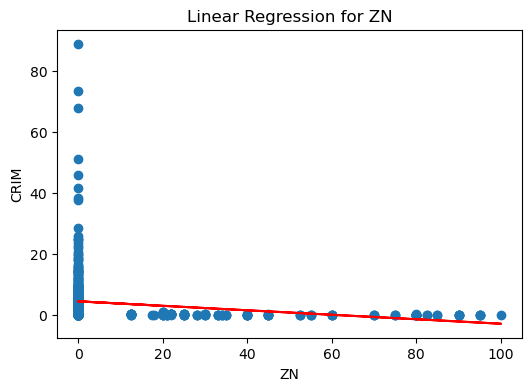

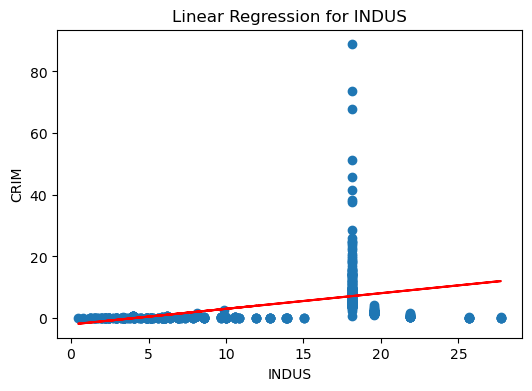

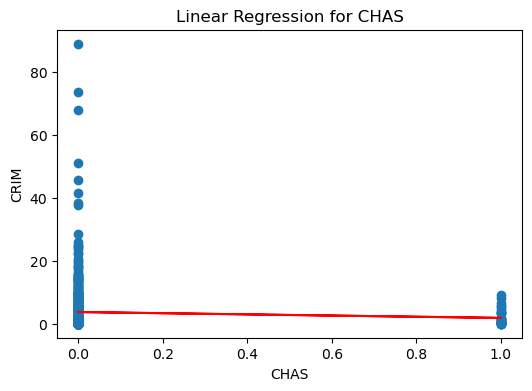

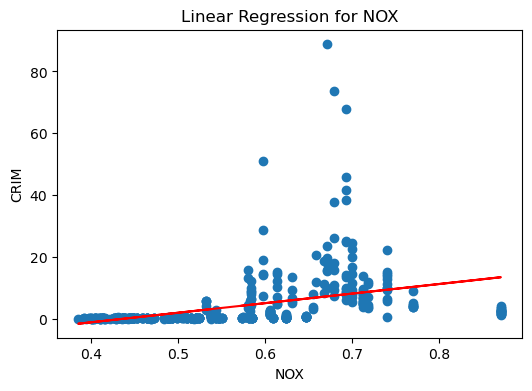

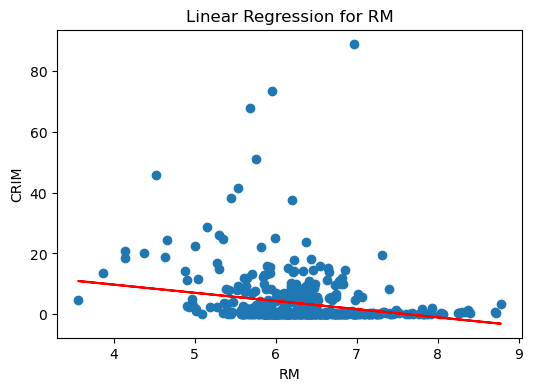

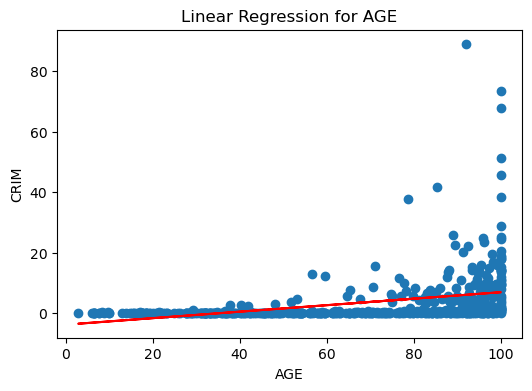

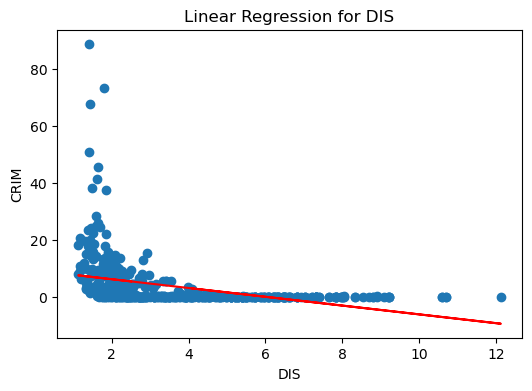

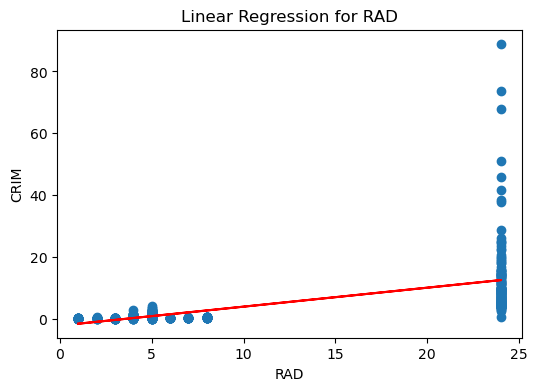

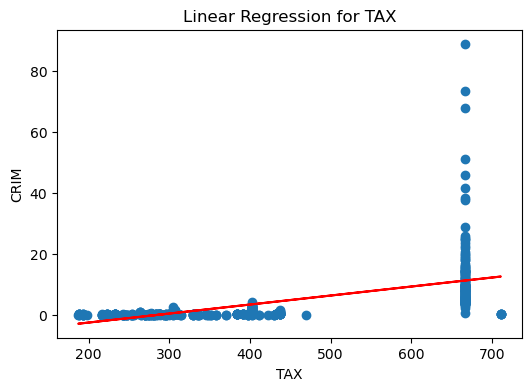

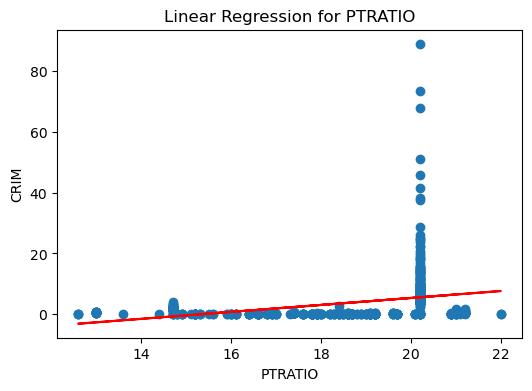

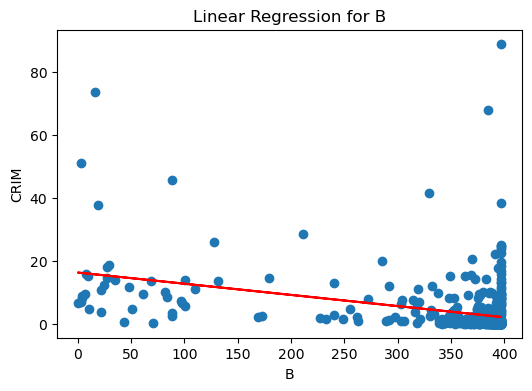

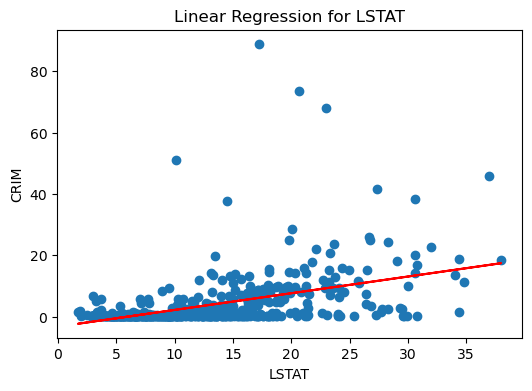

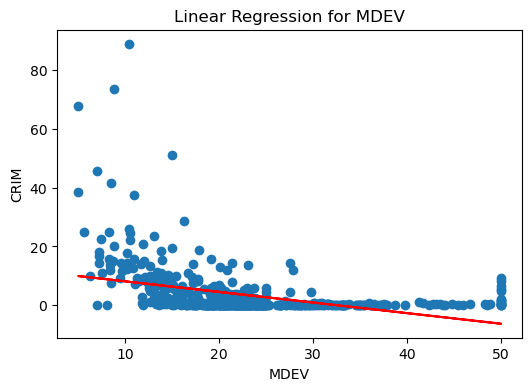

In [50]:
for predictor in predictors:
    X = df_boston[predictor]
    X = sm.add_constant(X)
    y = df_boston["CRIM"]

    model = sm.OLS(y, X).fit()

    # Create Figure and Axes objects
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot the data points
    scatter = ax.scatter(
        X.iloc[:, 1], # exclude intercept column
        y
        )

    # Plot the regression line
    line = ax.plot(
        X.iloc[:, 1], # exclude intercept column
        model.predict(X), 
        color='red'
        )

    ax.set_title(f"Linear Regression for {predictor}")
    ax.set_xlabel(predictor)
    ax.set_ylabel("CRIM")

    # Display the plot
    plt.show()

We can see that there are some correlations for each of the predictors except "CHAS," the dummy for whether the census tract borders the Charles River. There is a weak negative correlation between "CHAS" and "CRIM," but it looks like most census tracts have relatively low crime and do not border the Charles River. The tracts with high crime per capita do not border the Charles River, however.

We can also see that many of the relationships between predictors and CRIM look nonlinear, which suggests we may want to use a polynomial regression to allow our line of best fit to curve to better fit the data.

#### (b)

In [9]:
X = df_boston[predictors]
X = sm.add_constant(X)
y = df_boston["CRIM"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     30.73
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.04e-55
Time:                        14:23:37   Log-Likelihood:                -1655.7
No. Observations:                 506   AIC:                             3339.
Df Residuals:                     492   BIC:                             3399.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4184      7.270      2.396      0.017       3.135      31.702
ZN             0.0449      0.019      2.386      0.017       0.008       0.082
INDUS         -0.0616      0.084     -0.735      0.463      -0.226       0.103
CHAS          -0.7414      1.186     -0.625      0.532      -3.071       1.588
NOX          -10.6455      5.301     -2.008      0.045     -21.061      -0.230
RM             0.3811      0.616      0.619      0.536      -0.829       1.591
AGE            0.0020      0.018      0.112      0.911      -0.033       0.037
DIS           -0.9950      0.283     -3.514      0.000      -1.551      -0.439
RAD            0.5888      0.088      6.656      0.000       0.415       0.763
TAX           -0.0037      0.005     -0.723      0.470      -0.014       0.006
PTRATIO       -0.2787      0.187     -1.488      0.137      -0.647       0.089
B             -0.0069      0.004     -1.857      0.064      -0.014       0.000
LSTAT          0.1213      0.076      1.594      0.112      -0.028       0.271
MDEV          -0.1992      0.061     -3.276      0.001      -0.319      -0.080
==============================================================================
Omnibus:                      662.271   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82701.666
Skew:                           6.544   Prob(JB):                         0.00
Kurtosis:                      64.248   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we just look at the partial effects of each predictor, fewer are predictive of the crime rate per capita. Now, only amount of residential zoning, nitric oxide emissions, distance from employment centers, access to radial highways, and median home value are significant at the 5% significance level. 

For these predictors, we can reject the null hypothesis that there is no predicted effect of the independent variable on the per capita crime rate in Boston, holding the other predictors constant. We have evidence in favor of the alternative hypothesis that these predictors do have an expected effect on Boston per capita crime rates, holding the other predictors constant.

For the predictors with p-values greater than 0.05: INDUS, CHAS, RM, AGE, TAX, PTRATIO, and LSTAT, we fail to reject the null hypothesis that these variables have no expected effect on crime rate per capita.

#### (c)

In [11]:
multi_coefs = model.params.drop("const")

# https://stackoverflow.com/a/47561390
uni_vs_multi = pd.DataFrame(
    {"univariate coefficients": pd.Series(univar_coefs), # from part (a)
     "multivariate coefficients": multi_coefs}
     )

uni_vs_multi

,univariate coefficients,multivariate coefficients
ZN,-0.073521,0.044919
INDUS,0.506847,-0.061576
CHAS,-1.871545,-0.741435
NOX,30.975259,-10.645500
RM,-2.691045,0.381070
AGE,0.107131,0.002011
DIS,-1.542831,-0.994992
RAD,0.614137,0.588838
TAX,0.029563,-0.003746
PTRATIO,1.144613,-0.278731


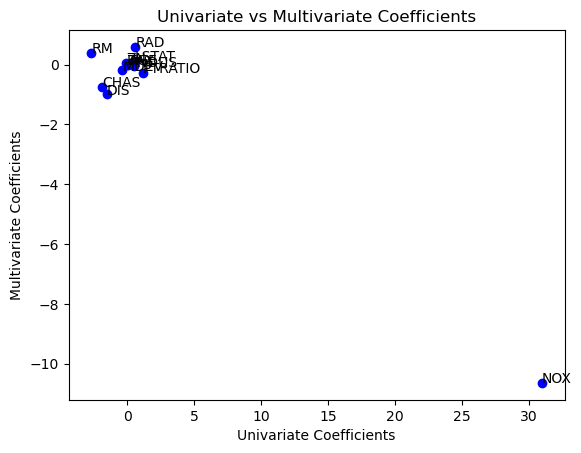

0.6114405634855775


In [12]:
fig, ax = plt.subplots()

ax.scatter(
    uni_vs_multi['univariate coefficients'], 
    uni_vs_multi['multivariate coefficients'], 
    color='blue'
    )

ax.set_title('Univariate vs Multivariate Coefficients')
ax.set_xlabel('Univariate Coefficients')
ax.set_ylabel('Multivariate Coefficients')

# Add labels for each point
for i, label in enumerate(uni_vs_multi.index):
    ax.annotate(
        label, 
        # coordinates
        (uni_vs_multi['univariate coefficients'][i], 
         uni_vs_multi['multivariate coefficients'][i])
         )

plt.show()

print(df_boston["NOX"].corr(df_boston["RAD"]))

We can see from the scatterplot that most of the univariate coefficients were similar though more positive than their multivariate counterparts. The coefficient that changed the most was nitric oxide concentration, which was a strong positive predictor of a higher per capita crime rate in the univariate regression, but actually predicts a lower per capita crime rate when we isolate its partial effect.

This may be because areas with high nitric oxide concentrations tend to be more industrial and closer to the city center, so they tend to have more crime on average. However, high nitric oxide concentrations actually are associated with lower crime rates, all else constant. The difference comes from the fact that NOX is correlated with other variables that are positively associated with crime, such as access to radial highways, which were confounding the univariate model.

#### (d)

In [13]:
for predictor in predictors:
    X = df_boston[predictor]
    X_squared = X**2
    X_cubed = X**3

    X_squared = X_squared.rename(f"{predictor}^2")
    X_cubed = X_cubed.rename(f"{predictor}^3")
    
    X = pd.concat([X, X_squared, X_cubed], axis=1)
    X = sm.add_constant(X)
    
    y = df_boston["CRIM"]

    model = sm.OLS(y, X).fit()

    print(f"Regression results for {predictor}:")
    display(model.summary())
    print("\n")

Regression results for ZN:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     10.24
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.49e-06
Time:                        14:48:39   Log-Likelihood:                -1791.1
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8193      0.433     11.133      0.000       3.969       5.670
ZN            -0.3303      0.110     -3.008      0.003      -0.546      -0.115
ZN^2           0.0064      0.004      1.670      0.096      -0.001       0.014
ZN^3       -3.753e-05   3.14e-05     -1.196      0.232   -9.92e-05    2.41e-05
==============================================================================
Omnibus:                      570.003   Durbin-Watson:                   0.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33886.468
Skew:                           5.285   Prob(JB):                         0.00
Kurtosis:                      41.672   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for INDUS:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     57.86
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.88e-32
Time:                        14:48:39   Log-Likelihood:                -1731.0
No. Observations:                 506   AIC:                             3470.
Df Residuals:                     502   BIC:                             3487.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6410      1.576      2.310      0.021       0.545       6.737
INDUS         -1.9533      0.483     -4.047      0.000      -2.901      -1.005
INDUS^2        0.2504      0.039      6.361      0.000       0.173       0.328
INDUS^3       -0.0069      0.001     -7.239      0.000      -0.009      -0.005
==============================================================================
Omnibus:                      611.416   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51547.097
Skew:                           5.815   Prob(JB):                         0.00
Kurtosis:                      51.059   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for CHAS:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7710
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.463
Time:                        14:48:39   Log-Likelihood:                -1805.3
No. Observations:                 506   AIC:                             3617.
Df Residuals:                     503   BIC:                             3629.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7232      0.396      9.395      0.000       2.945       4.502
CHAS        1.108e+14   2.71e+14      0.409      0.683   -4.22e+14    6.43e+14
CHAS^2     -5.578e+13   1.36e+14     -0.409      0.683   -3.24e+14    2.12e+14
CHAS^3       -5.5e+13   1.35e+14     -0.409      0.683   -3.19e+14    2.09e+14
==============================================================================
Omnibus:                      562.637   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30853.674
Skew:                           5.204   Prob(JB):                         0.00
Kurtosis:                      39.811   Cond. No.                     5.51e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.7e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""



Regression results for NOX:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     69.14
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.94e-37
Time:                        14:48:39   Log-Likelihood:                -1718.6
No. Observations:                 506   AIC:                             3445.
Df Residuals:                     502   BIC:                             3462.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.1421     33.734      6.822      0.000     163.864     296.420
NOX        -1264.1021    170.860     -7.398      0.000   -1599.791    -928.414
NOX^2       2223.2265    280.659      7.921      0.000    1671.816    2774.637
NOX^3      -1232.3894    149.687     -8.233      0.000   -1526.479    -938.300
==============================================================================
Omnibus:                      612.604   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52872.508
Skew:                           5.824   Prob(JB):                         0.00
Kurtosis:                      51.705   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for RM:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.29
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           9.06e-08
Time:                        14:48:40   Log-Likelihood:                -1788.2
No. Observations:                 506   AIC:                             3584.
Df Residuals:                     502   BIC:                             3601.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.9002     64.460      1.736      0.083     -14.744     238.545
RM           -38.7040     31.284     -1.237      0.217    -100.167      22.759
RM^2           4.4655      5.005      0.892      0.373      -5.369      14.300
RM^3          -0.1694      0.264     -0.643      0.521      -0.687       0.348
==============================================================================
Omnibus:                      586.445   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40548.719
Skew:                           5.484   Prob(JB):                         0.00
Kurtosis:                      45.461   Cond. No.                     5.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for AGE:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     34.86
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.76e-20
Time:                        14:48:40   Log-Likelihood:                -1758.2
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5592      2.771     -0.924      0.356      -8.003       2.884
AGE            0.2743      0.186      1.471      0.142      -0.092       0.641
AGE^2         -0.0072      0.004     -1.987      0.047      -0.014   -8.25e-05
AGE^3       5.737e-05   2.11e-05      2.719      0.007    1.59e-05    9.88e-05
==============================================================================
Omnibus:                      577.859   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39629.126
Skew:                           5.342   Prob(JB):                         0.00
Kurtosis:                      45.018   Cond. No.                     4.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for DIS:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     63.74
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           6.20e-35
Time:                        14:48:40   Log-Likelihood:                -1724.4
No. Observations:                 506   AIC:                             3457.
Df Residuals:                     502   BIC:                             3474.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.9496      2.448     12.235      0.000      25.140      34.759
DIS          -15.5172      1.737     -8.931      0.000     -18.931     -12.104
DIS^2          2.4479      0.347      7.061      0.000       1.767       3.129
DIS^3         -0.1185      0.020     -5.802      0.000      -0.159      -0.078
==============================================================================
Omnibus:                      577.986   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42441.952
Skew:                           5.310   Prob(JB):                         0.00
Kurtosis:                      46.592   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for RAD:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     109.5
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.47e-54
Time:                        14:48:40   Log-Likelihood:                -1678.7
No. Observations:                 506   AIC:                             3365.
Df Residuals:                     502   BIC:                             3382.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6050      2.057     -0.294      0.769      -4.645       3.435
RAD            0.5122      1.047      0.489      0.625      -1.545       2.569
RAD^2         -0.0750      0.149     -0.504      0.615      -0.368       0.218
RAD^3          0.0032      0.005      0.699      0.485      -0.006       0.012
==============================================================================
Omnibus:                      657.375   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76643.757
Skew:                           6.487   Prob(JB):                         0.00
Kurtosis:                      61.881   Cond. No.                     5.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for TAX:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     96.10
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.69e-49
Time:                        14:48:40   Log-Likelihood:                -1691.3
No. Observations:                 506   AIC:                             3391.
Df Residuals:                     502   BIC:                             3407.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0705     11.827      1.612      0.107      -4.166      42.307
TAX           -0.1524      0.096     -1.589      0.113      -0.341       0.036
TAX^2          0.0004      0.000      1.476      0.141      -0.000       0.001
TAX^3      -2.193e-07   1.89e-07     -1.158      0.247   -5.91e-07    1.53e-07
==============================================================================
Omnibus:                      642.369   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68905.900
Skew:                           6.249   Prob(JB):                         0.00
Kurtosis:                      58.786   Cond. No.                     6.16e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for PTRATIO:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     21.21
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.99e-13
Time:                        14:48:40   Log-Likelihood:                -1775.9
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        474.0255    156.823      3.023      0.003     165.915     782.135
PTRATIO      -81.8089     27.649     -2.959      0.003    -136.131     -27.487
PTRATIO^2      4.6039      1.609      2.862      0.004       1.444       7.764
PTRATIO^3     -0.0842      0.031     -2.724      0.007      -0.145      -0.023
==============================================================================
Omnibus:                      572.978   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36189.609
Skew:                           5.303   Prob(JB):                         0.00
Kurtosis:                      43.050   Cond. No.                     3.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for B:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     28.14
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.83e-17
Time:                        14:48:40   Log-Likelihood:                -1766.8
No. Observations:                 506   AIC:                             3542.
Df Residuals:                     502   BIC:                             3558.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9898      2.312      7.782      0.000      13.448      22.531
B             -0.0845      0.056     -1.497      0.135      -0.196       0.026
B^2            0.0002      0.000      0.760      0.447      -0.000       0.001
B^3        -2.895e-07   4.38e-07     -0.661      0.509   -1.15e-06     5.7e-07
==============================================================================
Omnibus:                      589.534   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42752.655
Skew:                           5.512   Prob(JB):                         0.00
Kurtosis:                      46.661   Cond. No.                     3.59e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for LSTAT:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     45.67
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           4.13e-26
Time:                        14:48:40   Log-Likelihood:                -1745.0
No. Observations:                 506   AIC:                             3498.
Df Residuals:                     502   BIC:                             3515.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0836      2.032      0.533      0.594      -2.909       5.076
LSTAT         -0.4133      0.466     -0.887      0.375      -1.328       0.502
LSTAT^2        0.0530      0.030      1.758      0.079      -0.006       0.112
LSTAT^3       -0.0008      0.001     -1.423      0.155      -0.002       0.000
==============================================================================
Omnibus:                      607.032   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53255.699
Skew:                           5.717   Prob(JB):                         0.00
Kurtosis:                      51.941   Cond. No.                     5.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



Regression results for MDEV:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     119.2
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.65e-58
Time:                        14:48:40   Log-Likelihood:                -1670.0
No. Observations:                 506   AIC:                             3348.
Df Residuals:                     502   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9386      3.366     15.725      0.000      46.325      59.553
MDEV          -5.0774      0.435    -11.668      0.000      -5.932      -4.222
MDEV^2         0.1551      0.017      8.995      0.000       0.121       0.189
MDEV^3        -0.0015      0.000     -7.277      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      568.100   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47296.533
Skew:                           5.084   Prob(JB):                         0.00
Kurtosis:                      49.259   Cond. No.                     3.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Several predictors have statistically significant polynomial terms at the 5% level, including the proportion of indutrially zoned acres, nitric oxide concentration, proportion of homes built before 1940, distance from employment centers, pupil-teacher ratio, and median home value. This makes sense if we look at the plots from part (a) since many of the relationships are flat and then spike up. These relationships can be modeled better with a curve than with a straight line, though curves are still not perfect. A model that can spike up and down like KNN might be able to fit the data better. We could also try taking the natural log of the per capita crime rate to reduce the spikiness.